 ***Loan approval***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score, confusion_matrix, classification_report

In [2]:
loan_df=pd.read_csv("loan_approval_dataset (1).csv")
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
loan_df.columns

In [ ]:
loan_df.dtypes

In [3]:
loan_df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
loan_df.shape

In [4]:
loan_df.duplicated().sum()

0

In [ ]:
loan_df.drop('loan_id',axis=1,inplace=True)

In [ ]:
loan_df.rename(columns={' no_of_dependents':'No_of_dependents',' self_employed':'Self_Employed',' loan_term':'Loan_Term',' education':'Education',' income_annum':'Income_annum',' loan_amount':'Loan_Amount',' cibil_score':'Cibil_Score',' residential_assets_value':'Residential_Assets_Value',' commercial_assets_value':'Commercial_Assets_Value',' luxury_assets_value':'Luxury_Assets_Value',' bank_asset_value':'Bank_Asset_Value',' loan_status':'Loan_Status'},inplace=True)

In [ ]:
plt.pie(loan_df.Loan_Status.value_counts(),labels=['Yes','No'],autopct='%1.1f%%',colors=['#BC7FCD','#FB9AD1'],explode=[0.1,0.1])

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="No_of_dependents",hue="Loan_Status",data=loan_df)
plt.grid()
plt.legend(loc='upper left')
plt.xlabel('No_of_dependents')
plt.ylabel('count')
plt.title('No_of_dependents vs Loan_Status')

from the above we can see that the number of dependents does not affect the loan approval

In [ ]:
loan_df.dtypes

In [ ]:
from sklearn import preprocessing 
    
# label_encoder object knows how  
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (loan_df.dtypes == 'object') 
for col in list(obj[obj].index): 
  loan_df[col] = label_encoder.fit_transform(loan_df[col])
# To find the number of columns with 
# datatype==object 
obj = (loan_df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))


In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(loan_df.corr(),annot=True,linewidths=0.5)

since we know that correlation coefficients greater than 0.7 or less than -0.7 are considered strong.so if a value is greater than 0.7 or less than -0.7 then we can drop that

from the above heatmap we can say that income_annum and loan_amount are highly correlated, hence we can drop one of them.

dropped columns:Bank_Asset_Value,Commercial_Assets_Value,Luxury_Assets_Value,Residential_Assets_Value,income_annum.

In [ ]:
loan_dropped_df=loan_df.drop(['Residential_Assets_Value','Commercial_Assets_Value','Luxury_Assets_Value','Income_annum','Bank_Asset_Value'],axis=1)

In [ ]:
sns.heatmap(loan_dropped_df.corr(),annot=True,linewidths=0.7)

In [ ]:
X=loan_dropped_df.drop('Loan_Status',axis=1)
y=loan_dropped_df.Loan_Status

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

---------------------------------------------------------------------------------------------------------------------

Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred_lr=lr_model.predict(X_test)
print(classification_report(y_test, y_pred_lr))

In [ ]:
cmf_lr=confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cmf_lr,annot=True,fmt='d')

In [ ]:
auc_score = roc_auc_score(y_test, y_pred_lr)#calculating auc score

print("AUC Score on Test Data:", auc_score)

----------------------------------------------------------------------------------------------------------------------------------------

Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators = 7, 
                             criterion = 'entropy', 
                             random_state =7) 
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       810
           1       0.95      0.93      0.94       471

    accuracy                           0.96      1281
   macro avg       0.95      0.95      0.95      1281
weighted avg       0.96      0.96      0.96      1281



AUC Score on Test Data: 0.9501533380514272


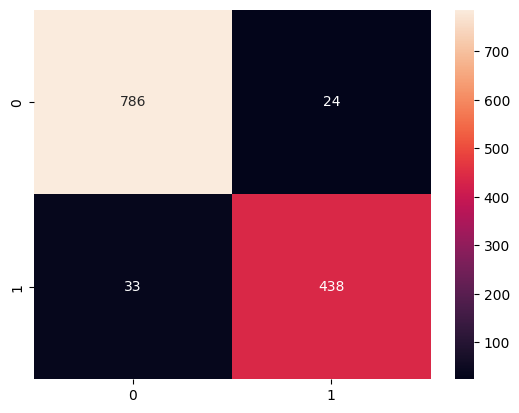

In [37]:
cmf_rfc=confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cmf_rfc,annot=True,fmt='d')
auc_score = roc_auc_score(y_test, y_pred_rfc)#calculating auc score

print("AUC Score on Test Data:", auc_score)

----------------------------------------------------------------------------------------------------------------------------------------------

SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV


In [39]:
svm_model=SVC()#svm model
svm_model.fit(X_train,y_train)

SVC()

In [40]:
y_pred_svm=svm_model.predict(X_test)#predicting the model

In [41]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       810
           1       0.00      0.00      0.00       471

    accuracy                           0.63      1281
   macro avg       0.32      0.50      0.39      1281
weighted avg       0.40      0.63      0.49      1281



c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [42]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)#calculating accuracy
print("Accuracy:", accuracy_svm)

Accuracy: 0.6323185011709602


In [43]:
cmf_svm=confusion_matrix(y_test, y_pred_svm)#calculating confusion matrix

<Axes: >

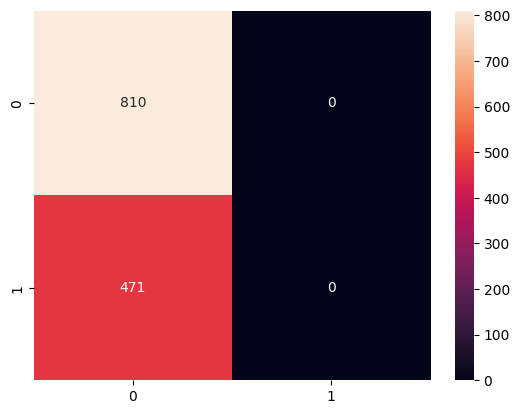

In [44]:
sns.heatmap(cmf_svm,annot=True,fmt='d')